# Kernel Example

Here, using scikit-learn, I create a few plots of the kernels (covariance functions) that are often used by those wanting to do GP modeling. The code is primarily based on the illustrative kernels by Jan Hendrik Metzen (see: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html).

For an in depth discussion of covariance fucntions used in GP modeling, I highly recommend the [Kernel Cookbook](https://www.cs.toronto.edu/~duvenaud/cookbook/), which is an excellent resource by David Duvenaud.

### Import Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, DotProduct)

### Define the Example Kernels

In [2]:
kernels = [RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), \
           DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)), \
           Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

### Visualize the kernel priors

/opt/sw/packages/gcc-4.8/python/3.5.2/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


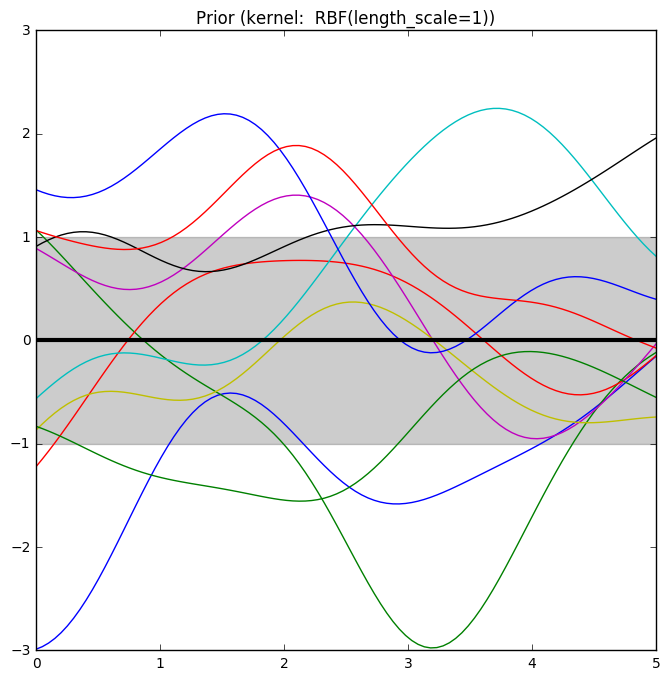

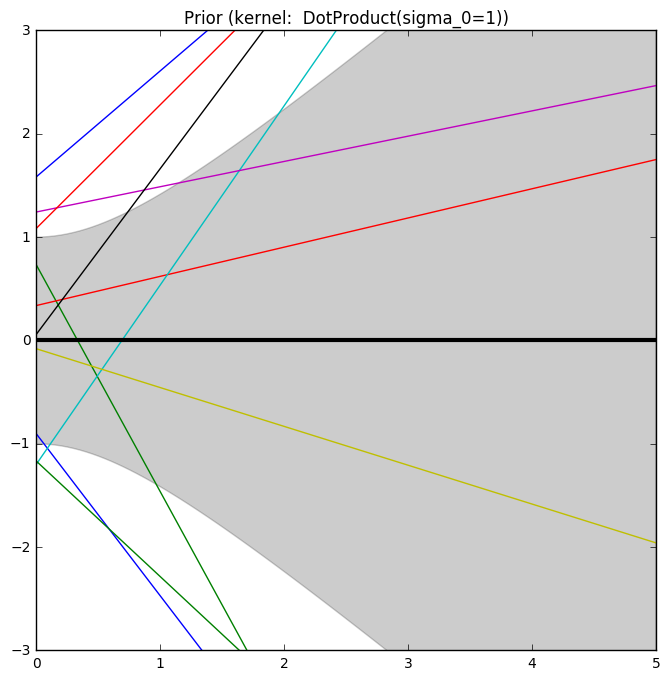

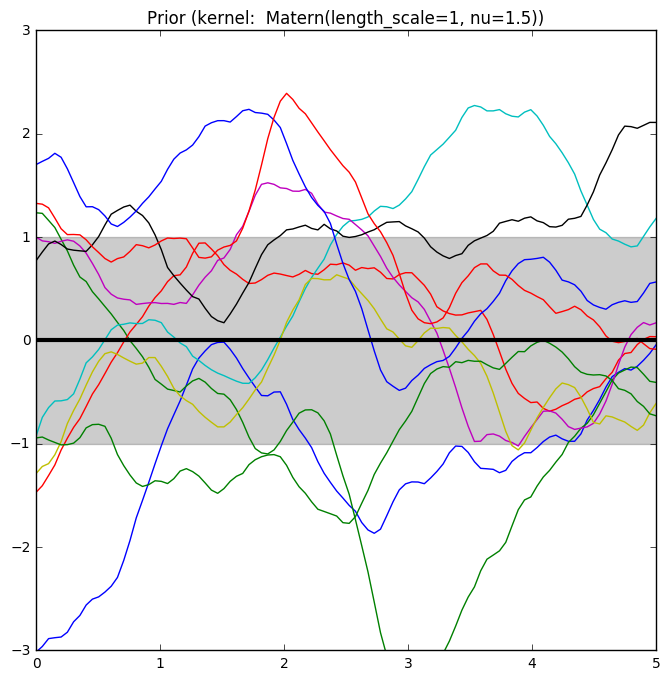

In [6]:
for fig_index, kernel in enumerate(kernels):
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(fig_index, figsize=(8, 8))
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

plt.show()

### Visualize the posteriors

/opt/sw/packages/gcc-4.8/python/3.5.2/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/opt/sw/packages/gcc-4.8/python/3.5.2/lib/python3.5/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


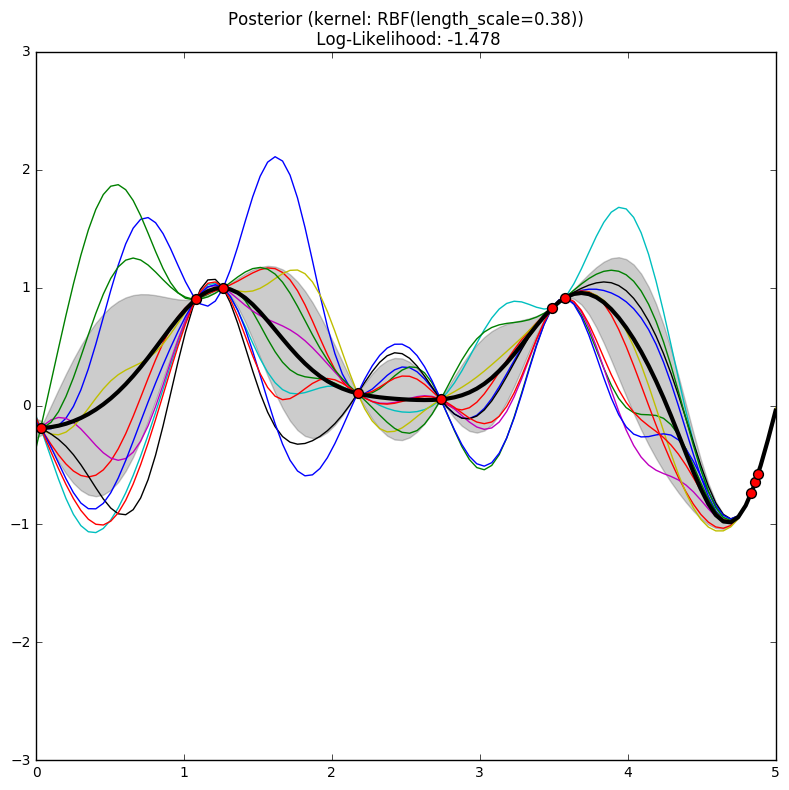

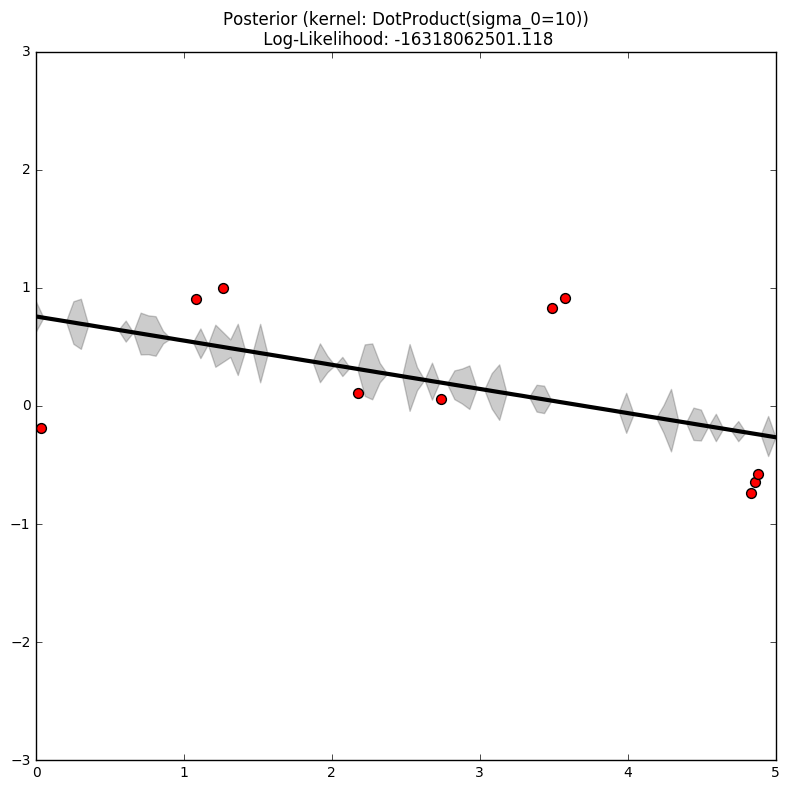

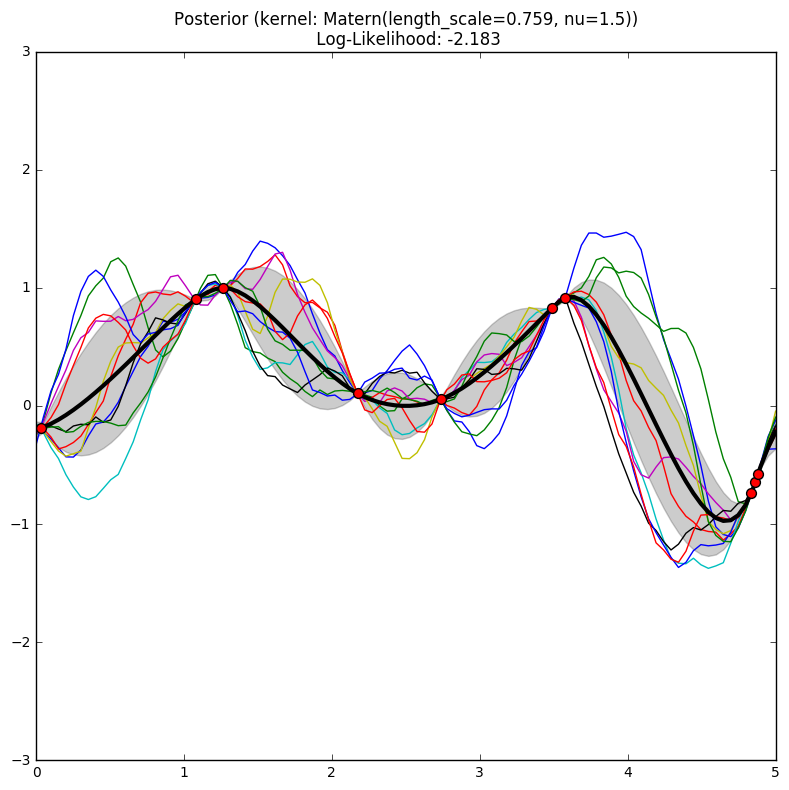

In [7]:
for fig_index2, kernel in enumerate(kernels):
    
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.figure(fig_index2, figsize=(8, 8))
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()